In [1]:
## PHASE 1: SET UP AND DATA 
## important necessary librares for Data explorarive data analaysis (EDA) AND machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")


In [2]:
## Load the datset from a CSV file to a pandas DataFrame
df = pd.read_csv("food_waste_data.csv")

In [3]:
## PHASE 2: DATA CLEANING AND PREPARATION

In [4]:
##display the first 10 rows of the DataFrame
df.head(10)

,Country,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),Confidence in estimate,M49 code,Region,Source
0,Afghanistan,126,82,3109153,16,594982,28,1051783,Very Low Confidence,4,Southern Asia,https://www.unep.org/resources/report/unep-foo...
1,Albania,127,83,238492,16,45058,28,79651,Very Low Confidence,8,Southern Europe,https://www.unep.org/resources/report/unep-foo...
2,Algeria,135,91,3918529,16,673360,28,1190335,Very Low Confidence,12,Northern Africa,https://www.unep.org/resources/report/unep-foo...
3,Andorra,123,84,6497,13,988,26,1971,Low Confidence,20,Southern Europe,https://www.unep.org/resources/report/unep-foo...
4,Angola,144,100,3169523,16,497755,28,879908,Very Low Confidence,24,Sub-Saharan Africa,https://www.unep.org/resources/report/unep-foo...
5,Antigua and Barbuda,113,74,7178,13,1244,26,2483,Low Confidence,28,Latin America and the Caribbean,https://www.unep.org/resources/report/unep-foo...
6,Argentina,116,72,3243563,16,700380,28,1238100,Very Low Confidence,32,Latin America and the Caribbean,https://www.unep.org/resources/report/unep-foo...
7,Armenia,137,93,275195,16,46259,28,81775,Very Low Confidence,51,Western Asia,https://www.unep.org/resources/report/unep-foo...
8,Aruba,113,74,7858,13,1362,26,2718,Low Confidence,533,Latin America and the Caribbean,https://www.unep.org/resources/report/unep-foo...
9,Australia,133,102,2563110,9,238248,22,546340,High Confidence,36,Australia and New Zealand,https://www.unep.org/resources/report/unep-foo...


In [5]:
## display the last 10 rows of the DataFrame
df.tail(10)

,Country,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),Confidence in estimate,M49 code,Region,Source
204,United States of America,139,59,19359951,16,5151313,64,20934827,High Confidence,840,Northern America,https://www.unep.org/resources/report/unep-foo...
205,United States Virgin Islands,113,74,7732,13,1340,26,2675,Low Confidence,850,Latin America and the Caribbean,https://www.unep.org/resources/report/unep-foo...
206,Uruguay,113,74,255892,13,44349,26,88517,Low Confidence,858,Latin America and the Caribbean,https://www.unep.org/resources/report/unep-foo...
207,Uzbekistan,135,91,3001868,16,515841,28,911881,Very Low Confidence,860,Central Asia,https://www.unep.org/resources/report/unep-foo...
208,Vanuatu,135,91,27296,16,4691,28,8292,Very Low Confidence,548,Melanesia,https://www.unep.org/resources/report/unep-foo...
209,Venezuela (Boliv. Rep. of),116,72,2065461,16,445994,28,788407,Very Low Confidence,862,Latin America and the Caribbean,https://www.unep.org/resources/report/unep-foo...
210,Viet Nam,120,76,7346717,16,1508689,28,2666991,Very Low Confidence,704,South-eastern Asia,https://www.unep.org/resources/report/unep-foo...
211,Yemen,148,104,3026946,16,456099,28,806270,Very Low Confidence,887,Western Asia,https://www.unep.org/resources/report/unep-foo...
212,Zambia,122,78,1391729,16,279350,28,493822,Very Low Confidence,894,Sub-Saharan Africa,https://www.unep.org/resources/report/unep-foo...
213,Zimbabwe,144,100,1458564,16,229059,28,404920,Very Low Confidence,716,Sub-Saharan Africa,https://www.unep.org/resources/report/unep-foo...


In [6]:
## Display basic information about the DataFrame (column, datatypes, Non-null counts)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Country                                 214 non-null    object
 1   combined figures (kg/capita/year)       214 non-null    int64 
 2   Household estimate (kg/capita/year)     214 non-null    int64 
 3   Household estimate (tonnes/year)        214 non-null    int64 
 4   Retail estimate (kg/capita/year)        214 non-null    int64 
 5   Retail estimate (tonnes/year)           214 non-null    int64 
 6   Food service estimate (kg/capita/year)  214 non-null    int64 
 7   Food service estimate (tonnes/year)     214 non-null    int64 
 8   Confidence in estimate                  214 non-null    object
 9   M49 code                                214 non-null    int64 
 10  Region                                  214 non-null    object
 11  Source

In [7]:
## Identify columns that should be numeric
numeric_cols = [
    'combined figures (kg/capita/year)',
    'Household estimate (kg/capita/year)',
    'Retail estimate (kg/capita/year)',
    'Food service estimate (kg/capita/year)'
]

In [8]:
# Convert these columns to numeric type, coercing errors to NaN (Not a Number)
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [9]:
## Check for missing alues in the DtaFrame
print(df.isnull().sum())


Country                                   0
combined figures (kg/capita/year)         0
Household estimate (kg/capita/year)       0
Household estimate (tonnes/year)          0
Retail estimate (kg/capita/year)          0
Retail estimate (tonnes/year)             0
Food service estimate (kg/capita/year)    0
Food service estimate (tonnes/year)       0
Confidence in estimate                    0
M49 code                                  0
Region                                    0
Source                                    0
dtype: int64


In [10]:
df.columns

Index(['Country', 'combined figures (kg/capita/year)',
       'Household estimate (kg/capita/year)',
       'Household estimate (tonnes/year)', 'Retail estimate (kg/capita/year)',
       'Retail estimate (tonnes/year)',
       'Food service estimate (kg/capita/year)',
       'Food service estimate (tonnes/year)', 'Confidence in estimate',
       'M49 code', 'Region', 'Source'],
      dtype='object')

In [11]:
df.describe()

,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),M49 code
count,214.000000,214.000000,2.140000e+02,214.000000,2.140000e+02,214.000000,2.140000e+02,214.000000
mean,126.794393,84.294393,2.658896e+06,15.116822,5.520454e+05,27.383178,1.138859e+06,433.971963
std,22.157879,18.313705,8.596906e+06,5.767840,2.195578e+06,6.508420,5.380459e+06,252.185786
min,61.000000,33.000000,8.500000e+02,3.000000,1.380000e+02,3.000000,2.760000e+02,4.000000
25%,115.000000,74.000000,6.831550e+04,13.000000,1.250925e+04,26.000000,2.239125e+04,219.000000
50%,123.000000,80.000000,5.205080e+05,16.000000,1.006500e+05,28.000000,1.884660e+05,432.000000
75%,137.750000,95.000000,2.111314e+06,16.000000,3.568158e+05,28.000000,6.307618e+05,645.250000
max,260.000000,189.000000,9.164621e+07,79.000000,2.242470e+07,90.000000,6.537774e+07,894.000000


In [12]:
df.Region

0                        Southern Asia
1                      Southern Europe
2                      Northern Africa
3                      Southern Europe
4                   Sub-Saharan Africa
                    ...               
209    Latin America and the Caribbean
210                 South-eastern Asia
211                       Western Asia
212                 Sub-Saharan Africa
213                 Sub-Saharan Africa
Name: Region, Length: 214, dtype: object

In [13]:
df.Country

0                     Afghanistan
1                         Albania
2                         Algeria
3                         Andorra
4                          Angola
                  ...            
209    Venezuela (Boliv. Rep. of)
210                      Viet Nam
211                         Yemen
212                        Zambia
213                      Zimbabwe
Name: Country, Length: 214, dtype: object

In [14]:
## PHASE 3: EXPLORATORY DATA ANALYSIS (EDA)
print("\n--- Starting EDA ---")


--- Starting EDA ---


In [15]:
## Set a consistent style for all plots
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))

<Figure size 1200x700 with 0 Axes>

<Figure size 1200x700 with 0 Axes>

In [16]:
## EDA 1: Top & Bottom 10 Countries by Waste Per Capita
## Sort the DataFrame by 'combined figures' to find the top 10 worst offenders
top_10_waste = df.sort_values(by='combined figures (kg/capita/year)', ascending=False).head(10)

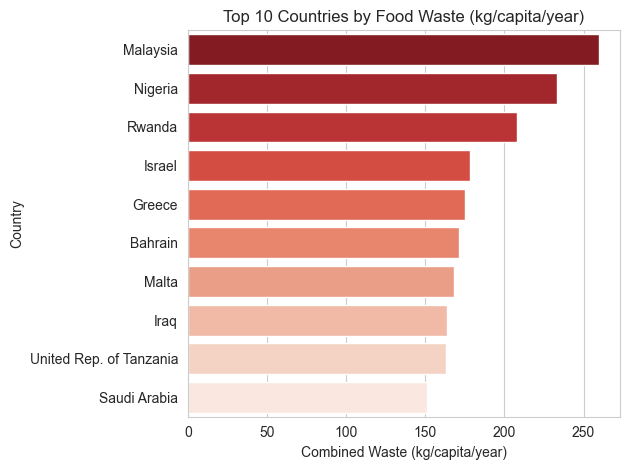

In [17]:
## Create a bar plot for the top 10 countries
sns.barplot(x='combined figures (kg/capita/year)', y='Country', data=top_10_waste, palette='Reds_r')
plt.title('Top 10 Countries by Food Waste (kg/capita/year)')
plt.xlabel('Combined Waste (kg/capita/year)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

In [18]:
## Sort the DataFrame to find the 10 best-performing countries
bottom_10_waste = df.sort_values(by='combined figures (kg/capita/year)', ascending=True).head(10)


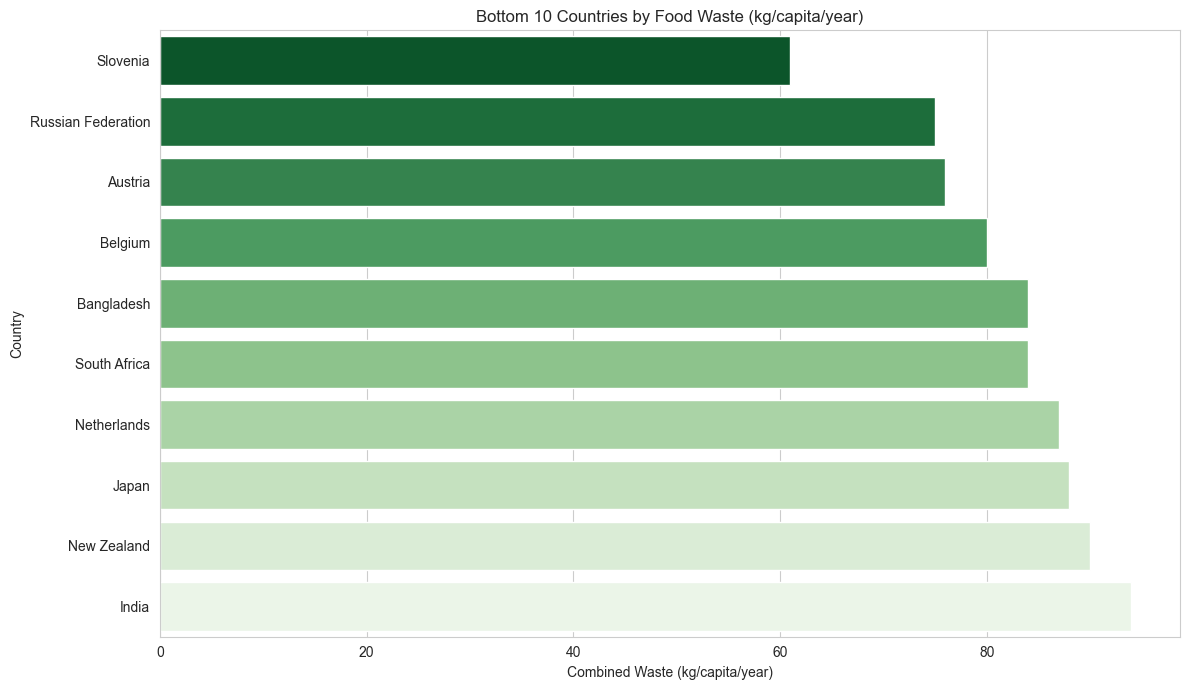

In [19]:
## Create a bar plot for the bottom 10 countries
plt.figure(figsize=(12, 7))
sns.barplot(x='combined figures (kg/capita/year)', y='Country', data=bottom_10_waste, palette='Greens_r')
plt.title('Bottom 10 Countries by Food Waste (kg/capita/year)')
plt.xlabel('Combined Waste (kg/capita/year)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

In [20]:
## EDA 2: Sector Analysis (Household vs. Retail vs. Food Service)
# Calculate the global total waste for each sector by summing the tonnes/year figures
sector_totals = df[['Household estimate (tonnes/year)', 'Retail estimate (tonnes/year)', 'Food service estimate (tonnes/year)']].sum()


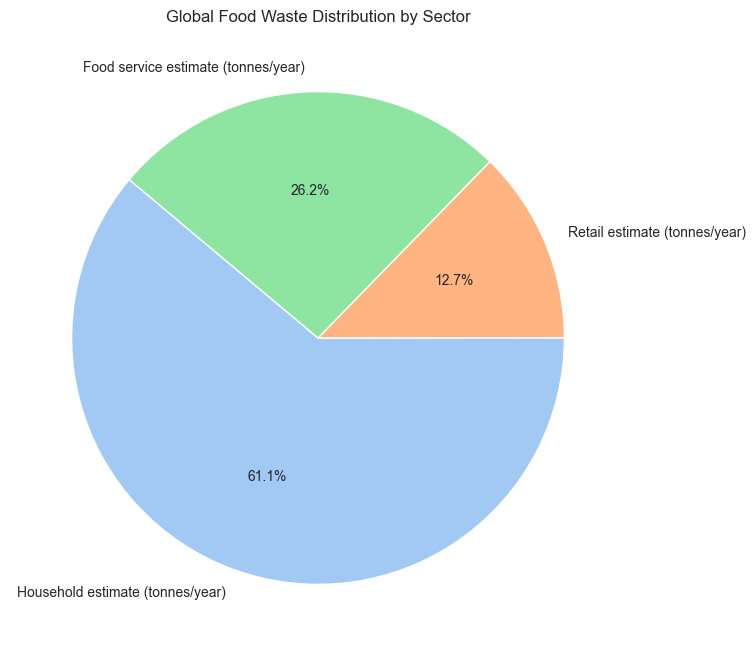

In [21]:
## Create a pie chart to show the proportion of waste from each sector
plt.figure(figsize=(8, 8))
plt.pie(sector_totals, labels=sector_totals.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Global Food Waste Distribution by Sector')
plt.ylabel('') ## Hide the y-label for pie charts
plt.show()

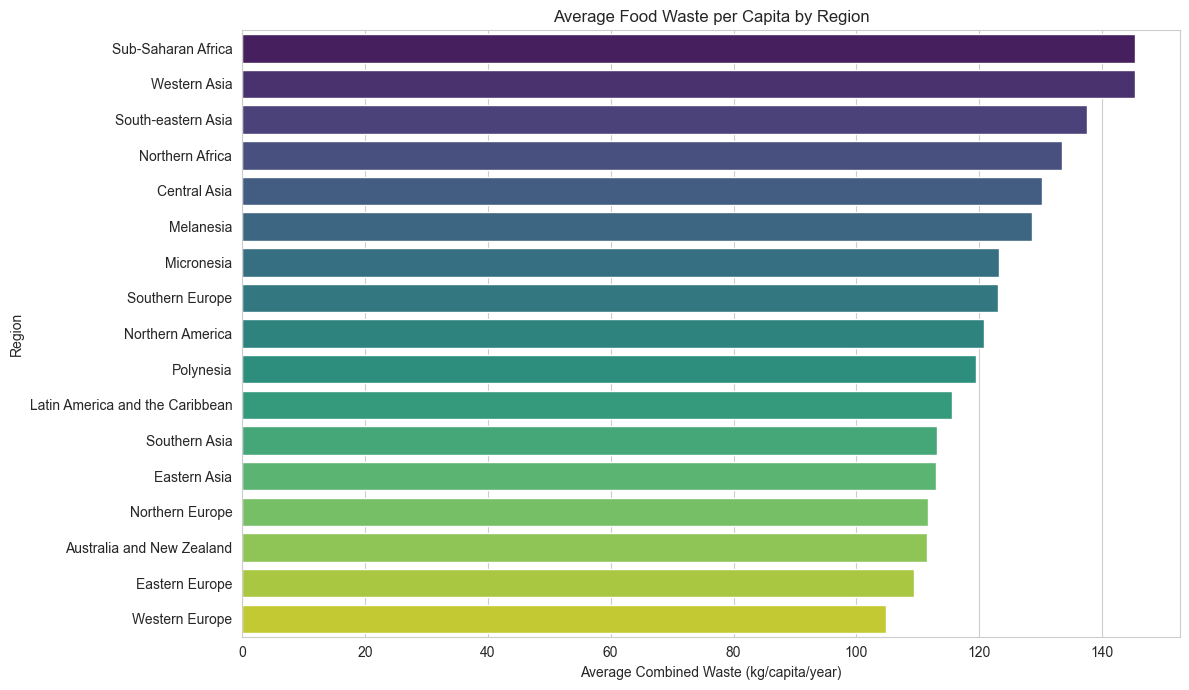

In [22]:
## EDA 3: Regional Analysis
# Group data by 'Region' and calculate the mean waste per capita
regional_waste = df.groupby('Region')['combined figures (kg/capita/year)'].mean().sort_values(ascending=False).reset_index()

# Create a bar plot to compare regions
plt.figure(figsize=(12, 7))
sns.barplot(x='combined figures (kg/capita/year)', y='Region', data=regional_waste, palette='viridis')
plt.title('Average Food Waste per Capita by Region')
plt.xlabel('Average Combined Waste (kg/capita/year)')
plt.ylabel('Region')
plt.tight_layout()
plt.show()


In [23]:
## EDA 4: Choropleth Map (Advanced Visualization) ---
## This map shows food waste per capita across the world
## The color of each country corresponds to its waste amount
fig = px.choropleth(df,
                    locations="Country",         # Column with country names
                    locationmode="country names", # Use country names to map
                    color="combined figures (kg/capita/year)", # Column to determine color
                    hover_name="Country",        # What to show when you hover
                    color_continuous_scale=px.colors.sequential.YlOrRd, # Color scale
                    title="Global Food Waste Map (kg/capita/year)")
fig.show()

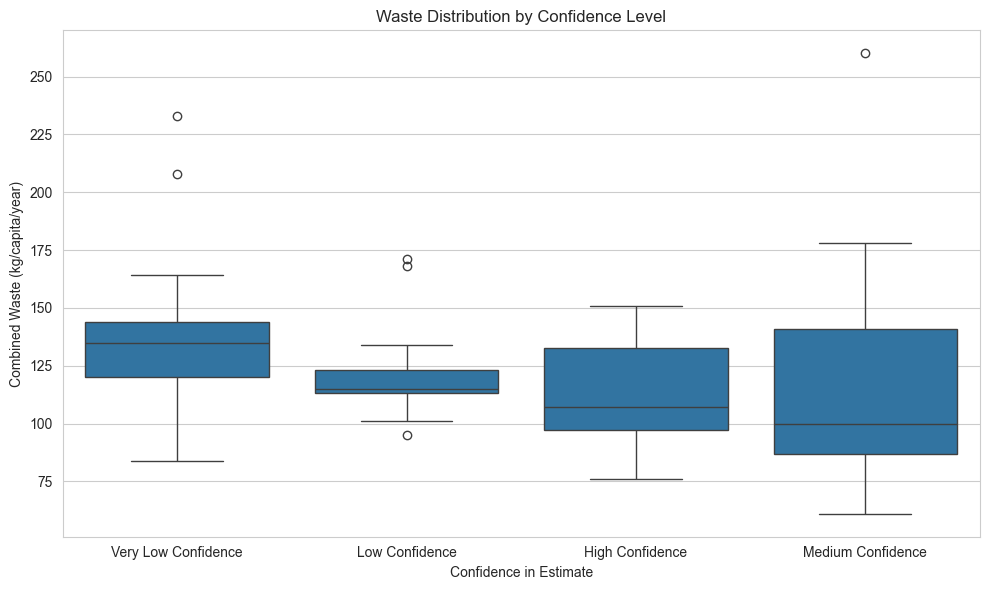

In [24]:
## EDA 5: Confidence in Estimate Analysis ---
## Use a box plot to see the distribution of waste for each level of confidence
plt.figure(figsize=(10, 6))
sns.boxplot(x='Confidence in estimate', y='combined figures (kg/capita/year)', data=df)
plt.title('Waste Distribution by Confidence Level')
plt.xlabel('Confidence in Estimate')
plt.ylabel('Combined Waste (kg/capita/year)')
plt.tight_layout()
plt.show()

In [25]:
##PHASE 4: MACHINE LEARNING (K-MEANS CLUSTERING)

print("\n--- Starting Machine Learning (Clustering) ---")



--- Starting Machine Learning (Clustering) ---


In [26]:
## Select the features we want to use to group the countries
## We use the per capita figures for a fair comparison
features = ['Household estimate (kg/capita/year)', 'Retail estimate (kg/capita/year)', 'Food service estimate (kg/capita/year)']
cluster_data = df[features].copy()


In [27]:
## Scale the data: This is CRUCIAL for distance-based algorithms like K-Means
## It ensures all features have a similar weight
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

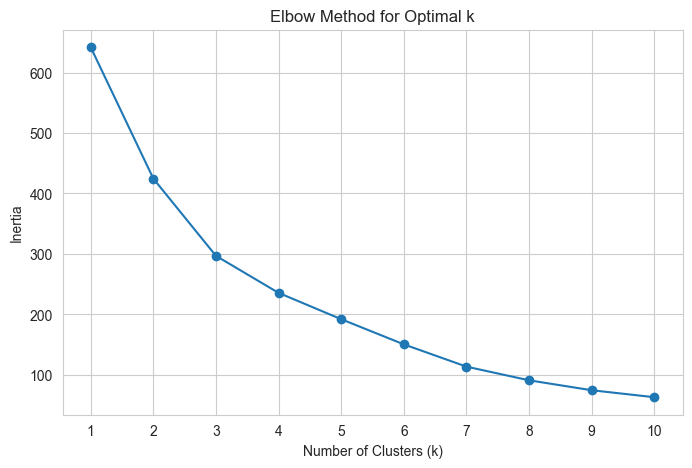

In [28]:

# Use the Elbow Method to find a good number of clusters (k)
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method results
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.show()
# From the plot, choose the 'elbow' point. Let's assume it's k=4 for this example.

In [29]:
## Apply K-Means with the chosen number of clusters
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(scaled_data)

,n_clusters,3
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'



--- Cluster Analysis Results ---
               Household estimate (kg/capita/year)  \
Waste_Cluster                                        
0                                        73.307692   
1                                        91.000000   
2                                       101.421687   

               Retail estimate (kg/capita/year)  \
Waste_Cluster                                     
0                                     13.969231   
1                                     79.000000   
2                                     16.144578   

               Food service estimate (kg/capita/year)  
Waste_Cluster                                          
0                                           26.807692  
1                                           90.000000  
2                                           27.530120  


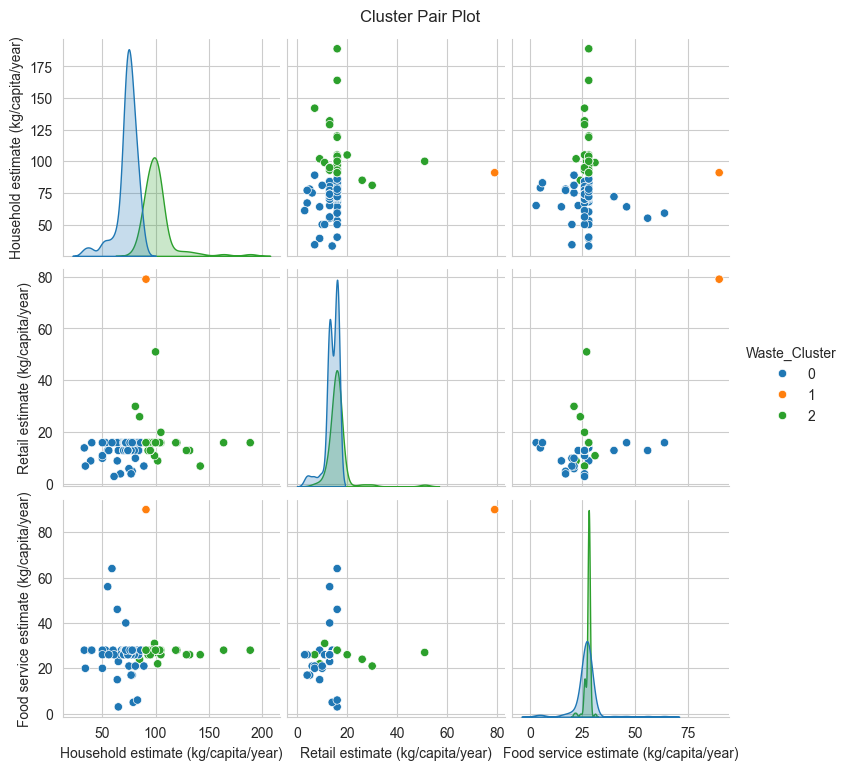

In [30]:
## Assign cluster labels to the DataFrame
df['Waste_Cluster'] = kmeans.labels_

## Cluster summaries
print("\n--- Cluster Analysis Results ---")
cluster_summary = df.groupby('Waste_Cluster')[features].mean()
print(cluster_summary)

## Visualize clusters with pairplot
sns.pairplot(df, hue='Waste_Cluster', vars=features, palette='tab10')
plt.suptitle("Cluster Pair Plot", y=1.02)
plt.show()


--- Cluster Analysis Results ---
               Household estimate (kg/capita/year)  \
Waste_Cluster                                        
0                                        73.307692   
1                                        91.000000   
2                                       101.421687   

               Retail estimate (kg/capita/year)  \
Waste_Cluster                                     
0                                     13.969231   
1                                     79.000000   
2                                     16.144578   

               Food service estimate (kg/capita/year)  
Waste_Cluster                                          
0                                           26.807692  
1                                           90.000000  
2                                           27.530120  


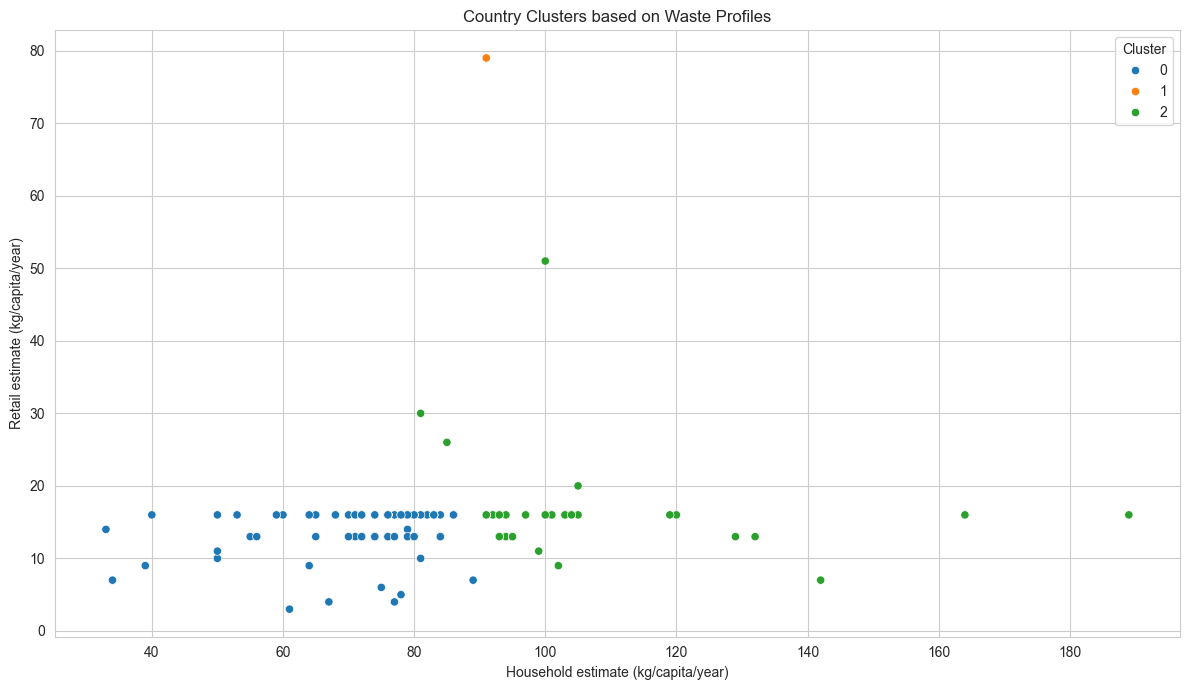


--- Project Complete ---


In [34]:
print("\n--- Cluster Analysis Results ---")
# Analyze the characteristics of each cluster by calculating the mean for each feature
cluster_summary = df.groupby('Waste_Cluster')[features].mean()
print(cluster_summary)

# Visualize the clusters
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='Household estimate (kg/capita/year)', y='Retail estimate (kg/capita/year)', hue='Waste_Cluster', palette='tab10')
plt.title('Country Clusters based on Waste Profiles')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

print("\n--- Project Complete ---")

In [31]:
# Find the country or countries in Cluster 1 (the orange dot)
outlier_country = df[df['Waste_Cluster'] == 1]

print("\n--- Outlier Country in Cluster 1 ---")
print(outlier_country)


--- Outlier Country in Cluster 1 ---
      Country  combined figures (kg/capita/year)  \
116  Malaysia                                260   

     Household estimate (kg/capita/year)  Household estimate (tonnes/year)  \
116                                   91                           2921577   

     Retail estimate (kg/capita/year)  Retail estimate (tonnes/year)  \
116                                79                        2518199   

     Food service estimate (kg/capita/year)  \
116                                      90   

     Food service estimate (tonnes/year) Confidence in estimate  M49 code  \
116                              2861537      Medium Confidence       458   

                 Region                                             Source  \
116  South-eastern Asia  https://www.unep.org/resources/report/unep-foo...   

     Waste_Cluster  
116              1  


In [32]:
# Find the country or countries in Cluster 0 (the blue dot)
countries_in_cluster_0 = df[df['Waste_Cluster'] == 0]

print("\n--- Countries in Cluster 0 ---")
print(countries_in_cluster_0)


--- Countries in Cluster 0 ---
                          Country  combined figures (kg/capita/year)  \
0                     Afghanistan                                126   
1                         Albania                                127   
3                         Andorra                                123   
5             Antigua and Barbuda                                113   
6                       Argentina                                116   
..                            ...                                ...   
205  United States Virgin Islands                                113   
206                       Uruguay                                113   
209    Venezuela (Boliv. Rep. of)                                116   
210                      Viet Nam                                120   
212                        Zambia                                122   

     Household estimate (kg/capita/year)  Household estimate (tonnes/year)  \
0                        

In [33]:
# Find the country or countries in Cluster 2 (the green dot)
countries_in_cluster_2 = df[df['Waste_Cluster'] == 2]

print("\n--- Countries in Cluster 2 ---")
print(countries_in_cluster_2)


--- Countries in Cluster 2 ---
                     Country  combined figures (kg/capita/year)  \
2                    Algeria                                135   
4                     Angola                                144   
7                    Armenia                                137   
9                  Australia                                133   
11                Azerbaijan                                137   
..                       ...                                ...   
203  United Rep. of Tanzania                                163   
207               Uzbekistan                                135   
208                  Vanuatu                                135   
211                    Yemen                                148   
213                 Zimbabwe                                144   

     Household estimate (kg/capita/year)  Household estimate (tonnes/year)  \
2                                     91                           3918529   
4      